<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/Project_3_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


Importing the Dependencies

NumPy (import numpy as np):
NumPy is a powerful library for numerical operations in Python.
It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays.
Pandas (import pandas as pd):

Pandas is a data manipulation library that provides data structures like DataFrame, which is particularly useful for working with structured data.
It offers tools for reading and writing data, manipulating dataframes, and handling missing data.
StandardScaler (from sklearn.preprocessing import StandardScaler):

StandardScaler is a preprocessing technique used to standardize the features of a dataset.
It removes the mean and scales the data to unit variance, ensuring that the features are on a similar scale.
train_test_split (from sklearn.model_selection import train_test_split):

train_test_split is a function for splitting a dataset into training and testing sets.
It randomly divides the data into subsets, typically used to train a machine learning model on one subset and evaluate its performance on another.
Support Vector Machine (SVM) (from sklearn import svm):

SVM is a supervised machine learning algorithm used for classification and regression tasks.
In this case, it seems SVM is being used for classification.
Accuracy Score (from sklearn.metrics import accuracy_score):

accuracy_score is a function that calculates the accuracy of a classification model.
It compares the predicted labels with the true labels and computes the accuracy as the fraction of correctly classified instances.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/sample_data/diabetes.csv')

In [3]:
pd.read_csv?

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

Count: Number of non-null observations for each column.
Mean: Average (mean) value for each column.
Std: Standard deviation of values for each column.
Min: Minimum value for each column.
25%: 25th percentile (first quartile) for each column.
50%: 50th percentile (median) for each column.
75%: 75th percentile (third quartile) for each column.
Max: Maximum value for each column.

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

Here is the mean of each column grouped by 'Outcome':

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Prepares data for machine learning: The Pima Indians Diabetes dataset contains features like glucose, BMI, and blood pressure, but their scales might differ significantly. This can distort the results of machine learning algorithms that rely on similar scales for each feature.

Standardizes feature scales: StandardScaler() addresses this by calculating the mean and standard deviation of each feature in the dataset. It then uses these values to transform each feature, subtracting the mean and dividing by the standard deviation. This results in all features having a mean of 0 and a standard deviation of 1.

Improves algorithm performance: By standardizing the features, the algorithm doesn't prioritize features with larger scales simply because their values are numerically higher. This allows the algorithm to focus on the actual patterns and relationships within the data, potentially leading to improved accuracy and generalizability.

Data Standardization

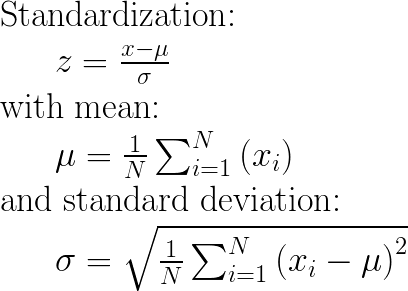

https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/


In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)

They simply create the scaler object and equip it with the necessary information from your data.
The actual standardization of the data will happen in a subsequent step, using the transform method of the scaler.
Standardization is often crucial for machine learning algorithms because it ensures that features with different scales don't unduly influence the results.
By putting features on a similar scale, you allow the algorithm to focus on the true patterns and relationships within the data, leading to more accurate and reliable insights.

In [15]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [17]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

X and Y: These are your input features and target labels, respectively. In the case of the Pima Indians Diabetes dataset, X might contain features like glucose, BMI, and blood pressure, while Y would be either 0 (non-diabetic) or 1 (diabetic).
test_size = 0.2: This specifies the proportion of data to be allocated to the test set. Here, 20% of the data will be used for testing, and the remaining 80% will be used for training the model.
stratify=Y: This ensures that the class distribution (proportion of each target label) in the training and test sets is roughly similar to the original dataset. This is important to avoid biases in the training data that could affect the model's performance on unseen data.
random_state=2: This sets the random seed for the shuffling process. Using a fixed seed ensures that the data split is reproducible, meaning you'll get the same training and test sets every time you run this line of code with the same input.
The output of this line is:

X_train: This contains the training features (80% of the original X data).
X_test: This contains the test features (20% of the original X data).
Y_train: This contains the training labels (corresponding to the features in X_train).
Y_test: This contains the test labels (corresponding to the features in X_test).
In essence, this line splits your data into two main groups:

Training set (80%): This larger set is used to train the machine learning model. The model learns patterns and relationships within this data to make predictions.
Test set (20%): This unseen data is used to evaluate the performance of the trained model on new data. It provides an unbiased assessment of how well the modelgeneralizes to unseen examples.
By splitting your data this way, you can avoid overfitting, which occurs when the model simply memorizes the training data and doesn't generalize well to new data.

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

Creates a model object: This line creates an object called classifier that will represent your machine learning model.
Uses SVM algorithm: The SVC() part indicates that you're using a Support Vector Machine (SVM), a powerful algorithm often used for classification tasks.
svm module: This module, likely from the scikit-learn library, provides tools for building SVM models.

Specifies decision boundary: This part determines the shape of the decision boundary that the SVM will create to separate the data points into classes (diabetic or non-diabetic).
Linear decision boundary: The 'linear' kernel means the model will try to find a straight line that best separates the two classes.
Simplest approach: This is often a good starting point for SVMs, as it's less prone to overfitting and can be more interpretable.

In [20]:
classifier = svm.SVC(kernel='linear')

1. classifier: This refers to the machine learning model object you've created, specifically an SVM model in this case.

2. .fit(): This method is used to train the model, meaning it teaches the model to identify patterns and relationships in the data that can be used to make predictions.

3. X_train: This represents the training features, which are the input data you'll use to train the model. In the Pima Indians Diabetes dataset, it might include features like glucose levels, BMI, age, and blood pressure.

4. Y_train: This represents the training labels, which are the known outcomes or classes associated with each data point in the training set. In this dataset, it would indicate whether each patient is diabetic (1) or non-diabetic (0).

So, classifier.fit(X_train, Y_train) essentially tells the SVM model to:

Analyze the training data: It carefully examines the features in X_train and their corresponding labels in Y_train.
Learn patterns: It identifies the relationships between the features and the labels, learning how specific feature combinations tend to correspond with different outcomes (diabetic or non-diabetic).
Build a decision boundary: It constructs a rule (in this case, a linear boundary) that can be used to classify new data points into the appropriate categories.

In [21]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

X_train_prediction = classifier.predict(X_train)

Making predictions on training data: This line uses the trained SVM model (classifier) to make predictions on the same data it was trained on (X_train).
Storing predictions: The model's predictions for each data point in X_train are stored in the variable X_train_prediction.
2. training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Evaluating accuracy: This line calculates the accuracy of the model's predictions on the training data.
Comparing predictions and true labels: It compares the predicted labels in X_train_prediction to the actual, known labels in Y_train.
Accuracy score: The accuracy_score function, from scikit-learn, computes the percentage of correct predictions.
Storing accuracy: The calculated accuracy is stored in the variable training_data_accuracy.

In [23]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [24]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [26]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [28]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
